Following are the steps with classifiers:

* decision tree with gini measure : max_depth = [5,10,15,20,25]
* decision tree with entropy measure: max_depth = [5,10,15,20,25] 
* baseline KNN with neighbors = 5 
* baseline RF with n_estimators (trees) = 100

1. Preparing data for training
1. training a classifier
2. testing a classifier  
3. Evaluating a classifier



# Setup

In [3]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split (not required, already splitted .33/0.66)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

%reload_ext autoreload
from preprocessing import *

In [ ]:

# import wandb
# wandb.init(project="visualize-sklearn_decision_tree")


# Global variables

In [4]:
# global dictionary to save accuracies for every model
acc_dict ={}
# global labels/class
labels = np.arange(1,27)
training_time = {}


# Convert text file to pandas dataframe

In [5]:
# reading a text file to csv file
raw_train_df = pd.read_csv(
    './Q1_dataset/letter_train', sep=" ", index_col=None, header=None)
raw_test__df = pd.read_csv(
    './Q1_dataset/letter_test', sep=" ", index_col=None, header=None)

# Preprocessing raw data
- this may take couple of minutes (around 3-6 mins) to preprocess the data

In [6]:
# preprocessing train data
train_df = preprocessing(raw_train_df)
train_df = extract_float(train_df)
train_df = change_objCol_to_float(train_df)

# preprocessing test data
test_df = preprocessing(raw_test__df)
test_df = extract_float(test_df)
test_df = change_objCol_to_float(test_df)
# plot_unique_values(test_df)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


In [8]:
# check if any missing values for both train and test
any_missing_values(train_df)
any_missing_values(test_df)

no null values found
no null values found


In [9]:
# correct format of data to process further
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15000 non-null  int64  
 1   feature_0   15000 non-null  float64
 2   feature_1   15000 non-null  float64
 3   feature_2   15000 non-null  float64
 4   feature_3   15000 non-null  float64
 5   feature_4   15000 non-null  float64
 6   feature_5   15000 non-null  float64
 7   feature_6   15000 non-null  float64
 8   feature_7   15000 non-null  float64
 9   feature_8   15000 non-null  float64
 10  feature_9   15000 non-null  float64
 11  feature_10  15000 non-null  float64
 12  feature_11  15000 non-null  float64
 13  feature_12  15000 non-null  float64
 14  feature_13  15000 non-null  float64
 15  feature_14  15000 non-null  float64
 16  feature_15  15000 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 1.9 MB


# Proceed to train 

In [10]:
# since the data is already splitted in 0.33/0.66 split
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [11]:
# shape of both data
X_train.shape, X_test.shape

((15000, 16), (5000, 16))

# Plain classifier
1. Decision tree with criteria gini measure

In [12]:
# instantiate the decisionclassifier class with gini index
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)
# predict the test set results with criterion gini index 
y_pred_gini = clf_gini.predict(X_test)
# check the performance of a classifier with gini index criterion
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.8746


# classifier for different max_Depths

In [13]:
max_depth_param = [5,10,15,20,25]
training_time_in_seconds = []
train_accuracy = []
test_accuracy = []

for max_depth in max_depth_param:
    # model
    clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth, random_state=0)
    # train the model
    start = time.time()
    clf_gini.fit(X_train,y_train)
    end = time.time()
    training_time_in_seconds.append(end-start)
    # predict 
    y_pred_train_gini = clf_gini.predict(X_train)
    y_pred_test_gini = clf_gini.predict(X_test)
    # estimate class probabilities
    y_probas_gini = clf_gini.predict_proba(X_test)
    importances = clf_gini.feature_importances_
    indices = np.argsort(importances)[::-1]
    # accuracy on train and test accuracy
    # print("for max depth:{}  train_accuracy: {}  test_accuracy: {}".format(max_depth,accuracy_score(y_train, y_pred_train_gini,accuracy_score(y_test, y_pred_test_gini)) ))
    
    train_accuracy.append(accuracy_score(y_train, y_pred_train_gini))
    test_accuracy.append(accuracy_score(y_test,y_pred_test_gini))

    
    

In [14]:
avg_acc_for_dt = sum(test_accuracy) / len(test_accuracy)
print('average accuracy for dt with gini is {}'.format(avg_acc_for_dt))

average accuracy for dt with gini is 0.73124


In [15]:
# append to global acc_dict to visualize later
acc_dict['DT_gini'] = max(test_accuracy)
training_time['DT_gini'] = max(training_time_in_seconds)

In [ ]:
# wandb.sklearn.plot_classifier(clf_gini, 
#                               X_train, X_test, 
#                               y_train.to_numpy(), y_test, 
#                               y_pred_test_gini, y_probas_gini,
#                               labels=np.arange(27),
#                               model_name = 'decision_tree',
#                               feature_names=None)

In [16]:
max_depth_param = [5,10,15,20,25]
e_training_time_in_seconds = []
e_train_accuracy = []
e_test_accuracy = []

for max_depth in max_depth_param:
    # model
    clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=0)
    # train the model
    e_start = time.time()
    clf_entropy.fit(X_train,y_train)
    e_end = time.time()
    e_training_time_in_seconds.append(e_end-e_start)
    # predict 
    y_pred_train_entropy = clf_entropy.predict(X_train)
    y_pred_test_entropy = clf_entropy.predict(X_test)
    # estimate class probabilities
    y_probas_entropy = clf_entropy.predict_proba(X_test)
    e_importances = clf_entropy.feature_importances_
    indices = np.argsort(e_importances)[::-1]
    # accuracy on train and test accuracy
    # print("for max depth:{}  train_accuracy: {}  test_accuracy: {}".format(max_depth,accuracy_score(y_train, y_pred_train_gini,accuracy_score(y_test, y_pred_test_gini)) ))
    
    e_train_accuracy.append(accuracy_score(y_train, y_pred_train_entropy))
    e_test_accuracy.append(accuracy_score(y_test,y_pred_test_entropy))

  
# append to global acc_dict to visualize later
acc_dict['DT_entropy'] = max(e_test_accuracy)
training_time['DT_entropy'] = max(e_training_time_in_seconds)  


In [17]:
avg_acc_for_dt_entropy = sum(e_test_accuracy) / len(e_test_accuracy)
print('average accuracy for dt with entropy is {}'.format(avg_acc_for_dt))

average accuracy for dt with entropy is 0.73124


In [ ]:

# wandb.init(project="visualize-sklearn_entropy_dt")

# wandb.sklearn.plot_classifier(clf_entropy, 
#                               X_train, X_test, 
#                               y_train.to_numpy(), y_test, 
#                               y_pred_test_entropy, y_probas_entropy,
#                               labels=np.arange(27),
#                               model_name = 'decision_tree_Entropy',
#                               feature_names=None)


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_gini))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       195
           2       0.79      0.80      0.80       199
           3       0.90      0.85      0.87       182
           4       0.85      0.90      0.87       207
           5       0.85      0.89      0.87       203
           6       0.88      0.83      0.85       210
           7       0.86      0.82      0.84       226
           8       0.79      0.81      0.80       196
           9       0.92      0.92      0.92       188
          10       0.87      0.88      0.88       172
          11       0.81      0.82      0.81       167
          12       0.91      0.93      0.92       201
          13       0.90      0.92      0.91       185
          14       0.92      0.89      0.90       178
          15       0.84      0.84      0.84       179
          16       0.89      0.90      0.90       206
          17       0.87      0.84      0.85       189
          18       0.79    

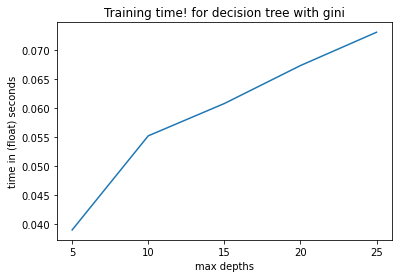

In [20]:
plt.plot(range(5,30,5),training_time_in_seconds)
plt.xlabel('max depths') 
plt.ylabel('time in (float) seconds') 
plt.title('Training time! for decision tree with gini')
plt.xticks(range(5,30,5))
# plt.show()
plt.savefig('trainingTime_for_decisionTree',bbox_inches='tight',dpi=150)

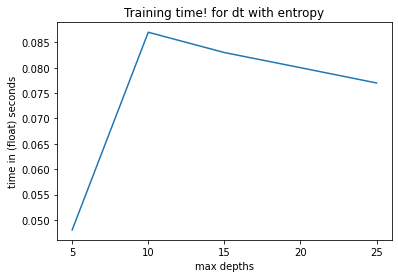

In [21]:
plt.plot(range(5,30,5),e_training_time_in_seconds)
plt.xlabel('max depths') 
plt.ylabel('time in (float) seconds') 
plt.title('Training time! for dt with entropy')
plt.xticks(range(5,30,5))
# plt.show()
plt.savefig('e_trainingTime_for_decisionTree',bbox_inches='tight',dpi=150)

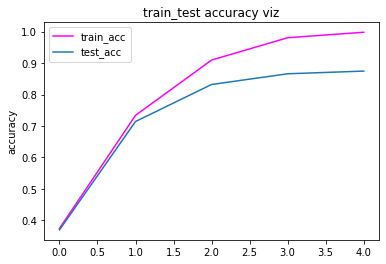

In [22]:
plt.plot(train_accuracy,color='magenta',label='train_acc')
plt.plot(test_accuracy, label='test_acc')
# plt.xticks(range(5,30,5))
# plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('train_test accuracy viz')
plt.legend(loc="upper left")
plt.show()
# plt.savefig('accuracy VS max_depth',bbox_inches='tight',dpi=150)

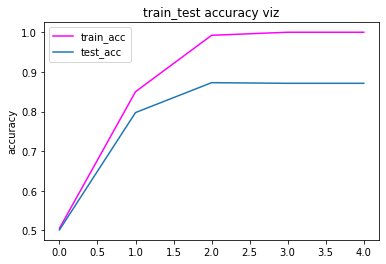

In [23]:
plt.plot(e_train_accuracy,color='magenta',label='train_acc')
plt.plot(e_test_accuracy, label='test_acc')
# plt.xticks(range(5,30,5))
# plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('train_test accuracy viz')
plt.legend(loc="upper left")
plt.show()
# plt.savefig('entropy accuracy VS max_depth',bbox_inches='tight',dpi=150)

# knn classifier
* It's a simple supervised classification algorithm we can use to assign a class to new data point. For a new data point, this algorithm looks around for n_neighbors to classify it.

In [ ]:
# wandb.init(project="visualize-sklearn_KNN")

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# baseline knn
clf_knn = KNeighborsClassifier()
knn_start = time.time()
clf_knn.fit(X_train, y_train)
knn_end = time.time()
print('training_time in seconds', knn_end - knn_start)
knn_y_test_pred = clf_knn.predict(X_test)
knn_y_probas = clf_knn.predict_proba(X_test)
print('accuracy is {}'.format(accuracy_score(y_test,knn_y_test_pred)))
 
acc_dict['knn'] = accuracy_score(y_test,knn_y_test_pred)
training_time['knn'] = knn_end - knn_start

training_time in seconds 0.007025480270385742
accuracy is 0.9518


In [ ]:
# wandb.sklearn.plot_classifier(clf_knn, 
#                               X_train, X_test, 
#                               y_train.to_numpy(), y_test, 
#                               knn_y_test_pred, knn_y_probas,
#                               labels=np.arange(27),
#                               model_name = 'KNN',
#                               feature_names=None)

In [26]:
# try different parameters, takes aroud .. sec
grid_params = {
    'n_neighbors': [2,3,5,7,9],
    'weights': ['uniform', 'distance'],
    'metric':['euclodean','manhattan']
}
# 5*2*2*3 = 60 times running the knn
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    # verbose = 1,
    cv = 3,
)
# fit the model
knn_gs_start = time.time()
gs_results = gs.fit(X_train, y_train)
knn_gs_end = time.time()
print('training_time(sec) for grid search ', knn_gs_end - knn_gs_start)

# print get best parameters and score for given model from the grid search
print('best accuracy:{}', gs_results.best_score_)
print('best estimator:{}', gs_results.best_estimator_)
print('best params:{}', gs_results.best_params_)



C:\Users\jprac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jprac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jprac\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\jprac\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\jprac\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclodean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a calla

training_time(sec) for grid search  39.60739779472351
best accuracy:{} 0.9415333333333334
best estimator:{} KNeighborsClassifier(metric='manhattan', weights='distance')
best params:{} {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


C:\Users\jprac\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.91433333 0.93753333
 0.92966667 0.9402     0.93026667 0.94153333 0.92926667 0.94133333
 0.92273333 0.93773333]
  warnings.warn(


# Random Forest classifier

* A RF is a meta estimator that fits a number of deicison tree classifiers on various sub-sample of dataset and uses averaging to improve the accuracy and control over-fitting.

In [28]:
from sklearn.ensemble import RandomForestClassifier
# fit the estimator
RF_clf=RandomForestClassifier(n_estimators=100)
# training time
rf_start = time.time()
# fit the model
RF_clf.fit(X_train,y_train)
rf_end = time.time()
print('training_time in seconds', rf_end-rf_start)
# predict using trained model
rf_y_test_pred = RF_clf.predict(X_test)
rf_y_probas = RF_clf.predict_proba(X_test)
print("RF Accuracy:",accuracy_score(y_test, rf_y_test_pred))


training_time in seconds 3.222623348236084
RF Accuracy: 0.9608


In [29]:

acc_dict['RandomForest'] = accuracy_score(y_test,rf_y_test_pred)
training_time['RandomForest'] = rf_end - rf_start

In [ ]:
# wandb.init(project="visualize-sklearn_RF")
# wandb.sklearn.plot_classifier(RF_clf, 
#                               X_train, X_test, 
#                               y_train.to_numpy(), y_test, 
#                               rf_y_test_pred, rf_y_probas,
#                               labels=np.arange(27),
#                               model_name = 'RF',
#                               feature_names=None)

# Global visualization

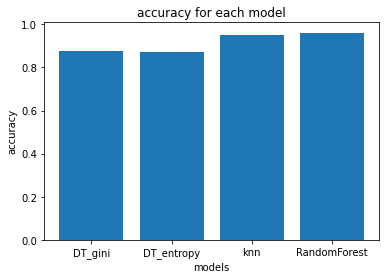

In [30]:
# best accuracies for each classifier
acc_dict
plt.bar(range(len(acc_dict)),acc_dict.values(),align='center')
plt.xticks(range(len(acc_dict)),list(acc_dict.keys()))
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy for each model')
plt.show() 
# plt.savefig('accuracy_for_classifiers')

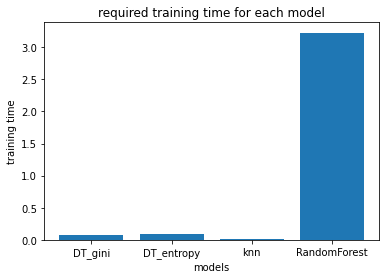

In [31]:
plt.bar(range(len(training_time)),training_time.values(),align='center')
plt.xticks(range(len(training_time)),list(training_time.keys()))
plt.xlabel('models')
plt.ylabel('training time')
plt.title('required training time for each model')
plt.show()
# plt.savefig('training_time_for_classifiers',bbox_inches='tight')